In [10]:
import pandas as pd 
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

import mlflow
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [11]:
df = pd.read_csv(r"E:\TY\SESD\SESD-PROJECT\data\clean_data\clean_data_set2.csv")
df.head()

,index,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [12]:
df.shape

(114000, 16)

In [13]:
sc = StandardScaler()
train_data = df.drop(columns=['index'])
print(f"df columns: {df.shape[1]}\ntrain data column: {train_data.shape[1]}")

train_data_trf = sc.fit_transform(train_data)
print(f"after standardization shape of data: {train_data_trf.shape}")

df columns: 16
train data column: 15
after standardization shape of data: (114000, 15)


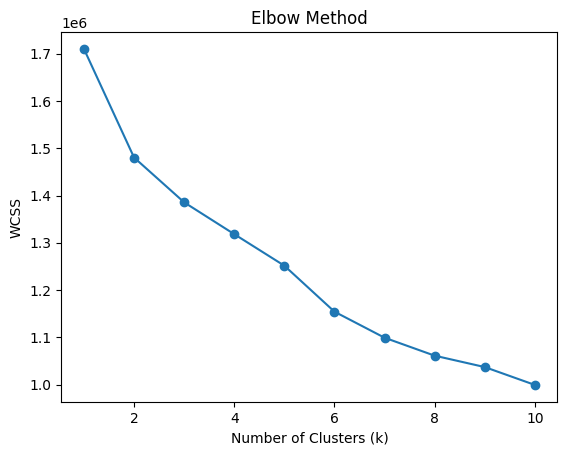

In [15]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(train_data_trf)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [18]:

mlflow.set_experiment("KMeans")
with mlflow.start_run():
        
        params = {"n_clusters": 4, "max_iter":100}
        mlflow.log_param("parameters", params)

        clf = KMeans(n_clusters=4, max_iter=100, random_state=42)
        labels = clf.fit_predict(train_data_trf)
        
        score1 = silhouette_score(train_data_trf, labels)
        score2 = calinski_harabasz_score(train_data_trf, labels)
        
        metrics = {"silhouette_scor":score1, "calinski_harabasz_score":score2}
        mlflow.log_metrics(metrics)

print(f'Silhouette Score: {score1:.3f}')
print(f"calinski harabasz score: {score2:.3f}")

2025/08/07 23:21:14 INFO mlflow.tracking.fluent: Experiment with name 'KMeans' does not exist. Creating a new experiment.


Silhouette Score: 0.156
calinski harabasz score: 12604.634
